In [28]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from mne.preprocessing import ICA,read_ica

In [29]:
#read the ICA filtered data file from the folder
sample_data_raw_file=('C:/Users/user/Desktop/ICA/03062019 3_ica.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)
raw_temp=raw.copy().crop(600., 620.) #Copy the raw data and crop the 30 sec data basically skype call
raw_ch = raw_temp.pick_channels(['FC1' ]) # select only one channel

Opening raw data file C:/Users/user/Desktop/ICA/03062019 3_ica.fif...
    Range : 0 ... 260479 =      0.000 ...  2034.992 secs
Ready.
Reading 0 ... 260479  =      0.000 ...  2034.992 secs...


<ipython-input-29-09f5d59fea1e>:3: RuntimeWarning: This filename (C:/Users/user/Desktop/ICA/03062019 3_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)


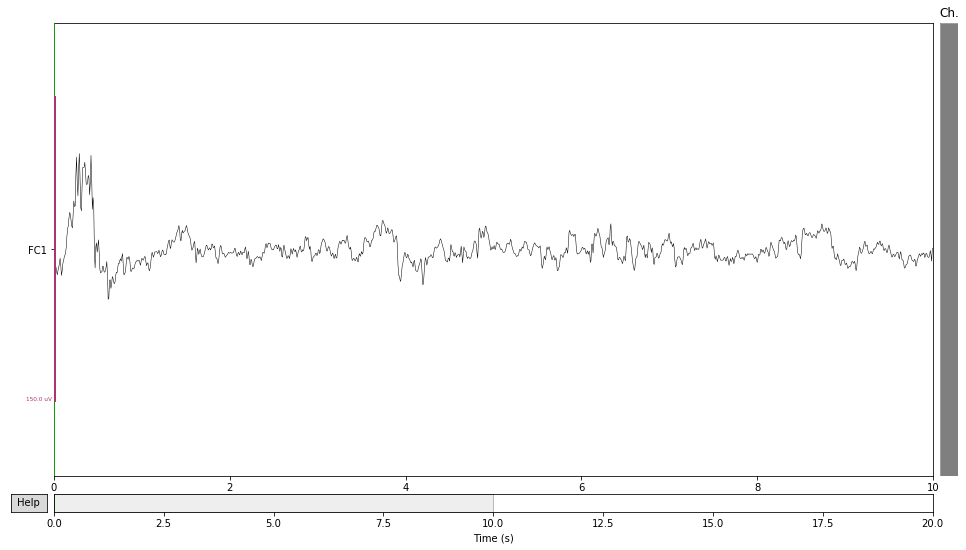

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 211 samples (1.648 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.

In [30]:
# EEG Bands are separated from FC1 channel using bandpass filter
raw_filt=raw_ch.copy()# copy the data for further uses
raw_filt.plot(scalings={"eeg": 75e-6}) #plot FC1 channel
Th_band = raw_filt.filter(4., 8., fir_design='firwin') # theta band
Al_band = raw_filt.filter(8.,13., fir_design='firwin') # Alpha band
Be_band = raw_filt.filter(13.,30., fir_design='firwin') # Beta band
Ga_band = raw_filt.filter(30., 56., fir_design='firwin') # gamma band

data shape ==>row,colm (1, 2561)
time shape ==>row,colm (2561,)


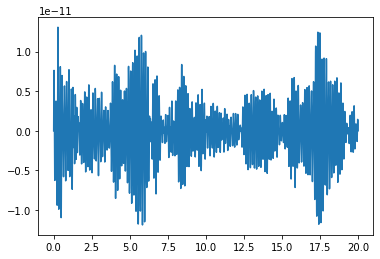

<class 'numpy.ndarray'>


In [31]:
#Refer:https://deerishi.wordpress.com/2013/09/23/signal-processing-using-python-part-1/
#farming and windowing of Bata band
data,times = Be_band[:]
print('data shape ==>row,colm',data.shape)
print('time shape ==>row,colm',times.shape)
plt.plot(times, data.T)# take transpose of data
plt.show()
#print((data.size))
print(type(data))

In [32]:
#KTE calculation:

tkeo = []

for i in range(0, len(data)):
    if i == 0 or i == len(data) - 1:
        tkeo.append(data[i])
    else:
        tkeo.append((data[i]**2) - (data[i + 1] * data[i - 1]))
tkeo =np.asarray(tkeo)
print('tkeo',tkeo)
print((tkeo.size))


tkeo [[ 1.58125591e-25  3.81363063e-12  6.50596664e-12 ...  1.30107245e-12
   7.46678396e-13 -1.57519746e-26]]
2561


In [57]:
#Signal windowing for tkeo.
fs=128
window_hop_length= 0.04 #40ms hop laegth
overlap=int(fs*window_hop_length)
print(overlap,'Overlap')

window_size=0.025 #20 ms window size,
framesize=int(window_size*fs) #no of frame
length=(tkeo.size)       #define length(size) of signal
print(framesize,'frame size')

number_of_frames=int(length/overlap)
print(type(number_of_frames))
print("number_of_frames=",number_of_frames)

frames=np.ndarray((number_of_frames,framesize))#np.ndarray
print(frames[212])
print('frames len',len(frames))
print(type(frames))


5 Overlap
3 frame size
<class 'int'>
number_of_frames= 512
[2.17766522e-076 1.14726725e-259 6.01347002e-154]
frames len 512
<class 'numpy.ndarray'>


In [58]:
kte_mu=np.nanmean(frames,axis=1) # calculate mean
print((kte_mu))

[8.70712596e-312 5.80481728e-029 1.61878426e-033 1.30858576e+179
 1.10570153e-033 1.36073679e-033 1.01959516e-057 3.16703993e-043
 1.09162424e+179 1.63741569e-062 8.59065547e-058 2.24783863e-067
 1.30753458e+179 2.87277634e-043 1.71685478e-062 2.41805459e-043
 1.10520292e-033 4.28156467e-058 1.48887663e-033 1.79725519e-062
 4.75570836e-072 3.62014694e-043 2.07555007e-038 1.71907141e-062
 1.36240733e+179 1.17868464e-057 2.37096289e-038 2.07746450e-038
 1.36134956e+179 2.49657754e-067 1.36048697e-033 5.97916231e-053
 8.75497866e+178 9.96928993e-068 1.58657087e-038 8.15485346e-043
 7.03401170e-053 3.37125814e-067 2.87277634e-043 1.78244298e-038
 2.24783863e-067 1.26691664e-052 1.39306432e-062 3.46598174e-043
 1.36114098e+179 1.33819882e-057 2.27186307e-038 2.56635861e-043
 1.25350197e+179 1.60787993e-057 6.33527620e-053 2.27302622e-038
 3.44302231e-048 1.19947182e+179 3.31655146e-043 5.63006868e-053
 5.63108140e-053 1.16864634e-033 2.27147746e-038 1.71688098e-062
 5.97907640e-053 5.812797

In [60]:
std = np.nanstd(frames,axis=1)# calculate standard division
print(std)

[0.00000000e+00 5.80481728e-29 2.28930665e-33            inf
 1.56369810e-33 1.92437242e-33 1.44189749e-57 4.47887082e-43
            inf 2.31565548e-62 1.21490215e-57 3.17892388e-67
            inf 4.06271926e-43 2.42799931e-62 3.41964560e-43
 1.56299295e-33 6.05504682e-58 2.10558953e-33 2.54170267e-62
 6.72558726e-72 5.11966090e-43 2.93527105e-38 2.43113410e-62
            inf 1.66691180e-57 3.35304788e-38 2.93797847e-38
            inf 3.53069381e-67 1.92401913e-33 8.45563019e-53
            inf 1.40978958e-67 2.24367969e-38 6.36893967e-44
 9.94759475e-53 2.92043608e-67 4.06271926e-43 2.52075504e-38
 3.17892388e-67 9.00003575e-53 1.97009045e-62 4.90163838e-43
            inf 1.89249892e-57 3.21289956e-38 3.62937915e-43
            inf 1.46283842e-57 8.95943352e-53 3.21449322e-38
 4.86916884e-48            inf 4.69022390e-43 7.96191446e-53
 7.96355169e-53 1.65271550e-33 3.21235424e-38 2.42798078e-62
 8.45569094e-53 8.22053708e-77 1.81651636e-57 2.52239749e-38
            inf 1.518473

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1508: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


In [61]:
import numpy as geek
kte_std=geek.nan_to_num(std) #remove the NAN and inf value from std
print(len(std))
print(std)

512
[0.00000000e+00 5.80481728e-29 2.28930665e-33            inf
 1.56369810e-33 1.92437242e-33 1.44189749e-57 4.47887082e-43
            inf 2.31565548e-62 1.21490215e-57 3.17892388e-67
            inf 4.06271926e-43 2.42799931e-62 3.41964560e-43
 1.56299295e-33 6.05504682e-58 2.10558953e-33 2.54170267e-62
 6.72558726e-72 5.11966090e-43 2.93527105e-38 2.43113410e-62
            inf 1.66691180e-57 3.35304788e-38 2.93797847e-38
            inf 3.53069381e-67 1.92401913e-33 8.45563019e-53
            inf 1.40978958e-67 2.24367969e-38 6.36893967e-44
 9.94759475e-53 2.92043608e-67 4.06271926e-43 2.52075504e-38
 3.17892388e-67 9.00003575e-53 1.97009045e-62 4.90163838e-43
            inf 1.89249892e-57 3.21289956e-38 3.62937915e-43
            inf 1.46283842e-57 8.95943352e-53 3.21449322e-38
 4.86916884e-48            inf 4.69022390e-43 7.96191446e-53
 7.96355169e-53 1.65271550e-33 3.21235424e-38 2.42798078e-62
 8.45569094e-53 8.22053708e-77 1.81651636e-57 2.52239749e-38
            inf 1.51

In [62]:
c_kte = kte_mu/(1+np.exp(-std)) #KTE Logistic Coefficients is calculated over every frame.
print(c_kte)

[4.35356298e-312 2.90240864e-029 8.09392129e-034 1.30858576e+179
 5.52850764e-034 6.80368395e-034 5.09797578e-058 1.58351996e-043
 1.09162424e+179 8.18707846e-063 4.29532773e-058 1.12391931e-067
 1.30753458e+179 1.43638817e-043 8.58427388e-063 1.20902730e-043
 5.52601458e-034 2.14078233e-058 7.44438317e-034 8.98627597e-063
 2.37785418e-072 1.81007347e-043 1.03777503e-038 8.59535704e-063
 1.36240733e+179 5.89342319e-058 1.18548145e-038 1.03873225e-038
 1.36134956e+179 1.24828877e-067 6.80243486e-034 2.98958115e-053
 8.75497866e+178 4.98464496e-068 7.93285434e-039 4.07742673e-043
 3.51700585e-053 1.68562907e-067 1.43638817e-043 8.91221491e-039
 1.12391931e-067 6.33458322e-053 6.96532159e-063 1.73299087e-043
 1.36114098e+179 6.69099408e-058 1.13593153e-038 1.28317930e-043
 1.25350197e+179 8.03939964e-058 3.16763810e-053 1.13651311e-038
 1.72151115e-048 1.19947182e+179 1.65827573e-043 2.81503434e-053
 2.81554070e-053 5.84323168e-034 1.13573873e-038 8.58440489e-063
 2.98953820e-053 2.906398

In [63]:
# load FC2 channel
sample_data_raw_file=('C:/Users/user/Desktop/ICA/03062019 3_ica.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)
raw_temp=raw.copy().crop(600., 620.) #Copy the raw data and crop the 30 sec data basically skype call
raw_ch = raw_temp.pick_channels(['FC2' ]) # select only one channel

Opening raw data file C:/Users/user/Desktop/ICA/03062019 3_ica.fif...
    Range : 0 ... 260479 =      0.000 ...  2034.992 secs
Ready.
Reading 0 ... 260479  =      0.000 ...  2034.992 secs...


<ipython-input-63-a6ddcb07abed>:3: RuntimeWarning: This filename (C:/Users/user/Desktop/ICA/03062019 3_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)


In [64]:
#raw_temp.info['ch_names']

In [65]:
raw_ch_2 = raw_temp.pick_channels(['FC2'])

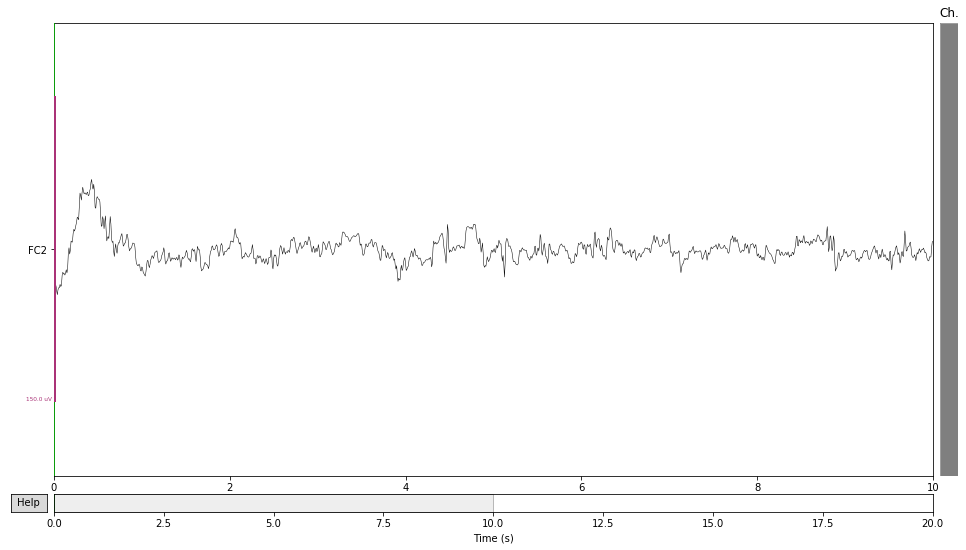

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 211 samples (1.648 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.

In [66]:
# EEG Bands are separated from FC1 channel using bandpass filter
raw_filt=raw_ch_2.copy()# copy the data
raw_filt.plot(scalings={"eeg": 75e-6})
Th_band = raw_filt.filter(4., 8., fir_design='firwin') # theta band
Al_band = raw_filt.filter(8.,13., fir_design='firwin') # Alpha band
Be_band = raw_filt.filter(13.,30., fir_design='firwin') # Beta band
Ga_band = raw_filt.filter(30., 56., fir_design='firwin') # gamma band

data shape ==>row,colm (1, 2561)
time shape ==>row,colm (2561,)


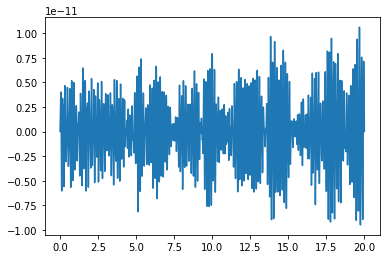

<class 'numpy.ndarray'>


In [67]:
#farming and windowing of Bata band
data,times = Be_band[:]
print('data shape ==>row,colm',data.shape)
print('time shape ==>row,colm',times.shape)
 # take transpose of data
plt.plot(times, data.T)
plt.show()
#print((data.size))
print(type(data))

In [68]:
#Signal windowing for FC2.
fs=128
window_hop_length= 0.04 #40ms hop laegth
overlap=int(fs*window_hop_length)
print(overlap,'Overlap')

window_size=0.023 #60 ms window size,
framesize=int(window_size*fs) #no of frame
length=(data.size)       #define length(size) of signal
print(framesize,'frame size')

number_of_frames=int(length/overlap)
print(type(number_of_frames))
print("number_of_frames=",number_of_frames)

frames=np.ndarray((number_of_frames,framesize))#np.ndarray
#print(frames[212])
print('frames len',len(frames))
print((frames))

5 Overlap
2 frame size
<class 'int'>
number_of_frames= 512
frames len 512
[[ 0.00000000e+000 -7.32144138e+029]
 [-6.81851667e-191 -3.45400485e+068]
 [ 3.89775976e+254  2.64422922e+160]
 ...
 [ 1.34905611e+098 -5.88305467e-264]
 [ 4.48568326e-032  1.01805409e+153]
 [ 3.71435830e+093 -1.88297590e+026]]


In [69]:
frames=geek.nan_to_num(frames)
print(frames)

[[ 0.00000000e+000 -7.32144138e+029]
 [-6.81851667e-191 -3.45400485e+068]
 [ 3.89775976e+254  2.64422922e+160]
 ...
 [ 1.34905611e+098 -5.88305467e-264]
 [ 4.48568326e-032  1.01805409e+153]
 [ 3.71435830e+093 -1.88297590e+026]]


In [70]:
b_mu = np.nanmean(frames,axis = 1) #mean over the frame of b band
print(b_mu)
print('len b_mu==>',len(b_mu))

[-3.66072069e+029 -1.72700242e+068  1.94887988e+254  1.64204504e-044
 -1.99849156e+036 -7.62621651e+059  1.44024970e+057 -6.00473379e+162
 -7.19364079e+126 -1.14077755e+074 -2.18697910e+236 -1.20528115e-303
  1.37202619e+160  3.89218773e+068  4.33832504e-191  2.38330152e-095
  8.14688360e+239  9.33739458e+097  1.18221076e+226  5.17832220e+050
  1.51006837e+260  1.88641149e+139 -3.42247222e-084  2.86479461e-146
 -3.74670770e+024 -6.09270454e+290  3.21765288e-053 -2.12172618e+000
  7.53694617e-152  2.43624216e+134  1.21501813e+050 -8.81944838e-156
 -5.89673227e+160 -8.43700157e-172  7.25567283e-180  4.84096990e-224
 -5.82352205e+303  2.06015186e+267 -1.12442739e+027 -3.33244942e+294
  4.73275725e+081 -1.08766651e+202 -7.71639664e-032 -4.43335818e+274
 -4.63100287e+127 -1.26649190e+272  2.38080627e+300 -2.31972575e+195
  8.44922647e+307  1.15246506e-041 -7.60591515e+208 -3.63467106e-045
  9.41720986e+235  2.79209549e+146 -1.02995222e+301  3.76031754e+019
  5.90694626e+223  6.85445428e+249

In [71]:
b_std = np.std(frames,axis=1)
print('len of std==>',(len(b_std)))
b_std=geek.nan_to_num(b_std)
print(b_std)

len of std==> 512
[3.66072069e+029 1.72700242e+068 1.79769313e+308 1.64204504e-044
 1.99849156e+036 7.62621651e+059 1.44024970e+057 1.79769313e+308
 7.19364079e+126 1.14077755e+074 1.79769313e+308 0.00000000e+000
 1.79769313e+308 3.89218773e+068 0.00000000e+000 2.38330152e-095
 1.79769313e+308 9.33739458e+097 1.79769313e+308 5.17832220e+050
 1.79769313e+308 1.88641149e+139 3.42247222e-084 2.86479461e-146
 3.74670770e+024 1.79769313e+308 3.21765288e-053 2.12172618e+000
 7.53694617e-152 2.43624216e+134 1.21501813e+050 8.81944838e-156
 1.79769313e+308 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.79769313e+308 1.79769313e+308 1.12442739e+027 1.79769313e+308
 4.73275725e+081 1.79769313e+308 7.71639535e-032 1.79769313e+308
 4.63100287e+127 1.79769313e+308 1.79769313e+308 1.79769313e+308
 1.79769313e+308 1.15246506e-041 1.79769313e+308 3.63467106e-045
 1.79769313e+308 2.79209549e+146 1.79769313e+308 3.76031754e+019
 1.79769313e+308 1.79769313e+308 5.32098436e+081 1.79769313e+308
 8.0203

In [72]:
c_s = b_mu/(1+np.exp(-b_std))

In [55]:
print('length of c_s==>',len(c_s))
print(c_s)


length of c_s==> 512
[ 1.73799580e-310  1.00344733e-320  4.09857488e+302  1.92730919e-043
  6.85025994e-058  9.73344746e-034  6.05750976e-053  2.37528844e-043
  8.43871975e-058  2.71354332e-072  2.37528844e-043  4.22837735e-053
  2.77110938e-048  4.22837735e-053  4.22837735e-053  4.14113719e-077
  4.14113719e-077  4.14113719e-077  4.14113719e-077  1.71784591e+179
  1.31293637e+179  1.63838239e+179  1.71784591e+179  4.14788779e-077
  9.24306883e-058  4.75347647e-053  4.14788779e-077  1.55867461e-038
  2.05826431e-067  1.34889659e-062  1.55867461e-038  3.11591429e-048
  3.11591429e-048  6.05243571e-053  3.11591429e-048  2.15205978e-067
  1.81739140e-043  2.15208411e-067  2.15208411e-067  2.43374913e-072
  2.37528844e-043  1.28764645e-062  2.71354327e-072  4.22837735e-053
  4.22837735e-053  4.22837735e-053  4.22837735e-053  8.93201506e-063
  4.14113719e-077  4.14113719e-077  4.14113719e-077  9.17405394e-063
  1.31293637e+179  1.71784591e+179  1.31451930e+179  1.31293637e+179
  4.75347647e

In [49]:
#feature vector
F_V = (c_kte,c_s)

In [73]:
fe = []
def feature(x,y):
    fe = (x,y)
    return fe
feature(c_kte,c_s)


(array([4.35356298e-312, 2.90240864e-029, 8.09392129e-034, 1.30858576e+179,
        5.52850764e-034, 6.80368395e-034, 5.09797578e-058, 1.58351996e-043,
        1.09162424e+179, 8.18707846e-063, 4.29532773e-058, 1.12391931e-067,
        1.30753458e+179, 1.43638817e-043, 8.58427388e-063, 1.20902730e-043,
        5.52601458e-034, 2.14078233e-058, 7.44438317e-034, 8.98627597e-063,
        2.37785418e-072, 1.81007347e-043, 1.03777503e-038, 8.59535704e-063,
        1.36240733e+179, 5.89342319e-058, 1.18548145e-038, 1.03873225e-038,
        1.36134956e+179, 1.24828877e-067, 6.80243486e-034, 2.98958115e-053,
        8.75497866e+178, 4.98464496e-068, 7.93285434e-039, 4.07742673e-043,
        3.51700585e-053, 1.68562907e-067, 1.43638817e-043, 8.91221491e-039,
        1.12391931e-067, 6.33458322e-053, 6.96532159e-063, 1.73299087e-043,
        1.36114098e+179, 6.69099408e-058, 1.13593153e-038, 1.28317930e-043,
        1.25350197e+179, 8.03939964e-058, 3.16763810e-053, 1.13651311e-038,
        1.72

In [74]:
print((F_V))

(array([4.35704971e-312, 1.06099790e-314, 1.06099790e-314, 1.06099790e-314,
       1.06099790e-314, 1.06099790e-314, 1.06099790e-314, 1.06099790e-314,
       1.06099790e-314, 1.06099790e-314, 1.06099790e-314, 1.06099790e-314,
       1.06099790e-314, 1.06099790e-314, 1.06099790e-314, 1.06099790e-314,
       1.06099790e-314, 1.06099790e-314, 1.06099790e-314, 1.06099790e-314,
       1.06099790e-314, 1.06099790e-314, 1.06099790e-314, 1.06099790e-314,
       1.06099790e-314, 1.06099790e-314, 1.06099790e-314, 1.06099790e-314,
       1.06099790e-314, 1.06099790e-314, 1.06099790e-314, 1.06099790e-314,
       1.06099790e-314, 1.06099790e-314, 1.06099790e-314, 1.06099790e-314,
       1.06099790e-314, 1.06099790e-314, 1.06099790e-314, 1.06099790e-314,
       1.06099790e-314, 1.06099790e-314, 1.06099790e-314, 1.06099790e-314,
       1.06099790e-314, 1.06099790e-314, 1.06099790e-314, 1.06099790e-314,
       1.06099790e-314, 1.06099790e-314, 1.06099790e-314, 1.06099790e-314,
       1.06099790e-314, 

In [ ]:
print(c_s.shape)

In [ ]:
print(c_kte.shape)